### **import library**

In [1291]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
import math

# library datetime
from datetime import datetime
from operator import attrgetter

pd.set_option('display.max_columns', None)

# menghilangkan warning
import warnings
warnings.filterwarnings('ignore')

# **BUSINESS PROBLEM**

> **Question:**</br> Bagaimana cara meningkatkan profit perusahaan dengan fokus pada perilaku pelanggan, pengeluaran, dan interaksi mereka dengan berbagai produk dan promosi?

# **DATA UNDERSTANDING**

### **Supermarket Customers Data Dictionary**

#### **People**
- `ID` : Customer's unique identifier
- `Year_Birth` : Customer's birth year
- `Education` : Customer's education level
- `Marital_Status` : Customer's marital status
- `Income` : Customer's yearly household income
- `Kidhome` : Number of children in customer's household
- `Teenhome` : Number of teenagers in customer's household
- `Dt_Customer` : Date of customer's enrollment with the company
- `Recency` : Number of days since customer's last purchase
- `Complain` : 1 if the customer complained in the last 2 years, 0 otherwise

#### **Products**
- `MntWines` : Amount spent on wine in last 2 years
- `MntFruits` : Amount spent on fruits in last 2 years
- `MntMeatProducts` : Amount spent on meat in last 2 years
- `MntFishProducts` : Amount spent on fish in last 2 years
- `MntSweetProducts` : Amount spent on sweets in last 2 years
- `MntGoldProds` : Amount spent on gold in last 2 years

#### **Promotion**
- `NumDealsPurchases` : Number of purchases made with a discount
- `AcceptedCmp1` : 1 if the customer accepted the offer in the 1st campaign, 0 otherwise
- `AcceptedCmp2` : 1 if the customer accepted the offer in the 2nd campaign, 0 otherwise
- `AcceptedCmp3` : 1 if the customer accepted the offer in the 3rd campaign, 0 otherwise
- `AcceptedCmp4` : 1 if the customer accepted the offer in the 4th campaign, 0 otherwise
- `AcceptedCmp5` : 1 if the customer accepted the offer in the 5th campaign, 0 otherwise
- `Response` : 1 if the customer accepted the offer in the last campaign, 0 otherwise

#### **Place**
- `NumWebPurchases` : Number of purchases made through the company’s website
- `NumCatalogPurchases` : Number of purchases made using a catalog
- `NumStorePurchases` : Number of purchases made directly in stores
- `NumWebVisitsMonth` : Number of visits to the company’s website in the last month

# **DATA CLEANING**

## **1. Check Tipe Data, Missing Value, Unique dan Duplikat**

In [1292]:
df = pd.read_csv('Supermarket Customers.csv',
                 sep='\t',
                 dtype={'ID' : str})
display(df.head())
print('Jumlah row dan column :', df.shape)

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,546,172,88,88,3,8,10,4,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,6,2,1,6,2,1,1,2,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,127,111,21,42,1,8,2,10,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,20,10,3,5,2,2,0,4,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,118,46,27,15,5,5,3,6,5,0,0,0,0,0,0,3,11,0


Jumlah row dan column : (2240, 29)


In [1293]:
print(f'Total seluruh data duplicate : {df.duplicated().sum()}')

Total seluruh data duplicate : 0


In [1294]:
print(f'Jika ID di kesampingkan ada sekitar {df.duplicated(subset=df.columns.difference(['ID'])).sum()} data Duplicate')
pd.DataFrame({'Tipe' : df.dtypes,
              'Null' : df.isna().sum(),
              'Unique' : df.nunique(),
              'Duplicate' : df.duplicated(subset=df.columns.difference(['ID'])).sum()})

Jika ID di kesampingkan ada sekitar 182 data Duplicate


,Tipe,Null,Unique,Duplicate
ID,object,0,2240,182
Year_Birth,int64,0,59,182
Education,object,0,5,182
Marital_Status,object,0,8,182
Income,float64,24,1974,182
Kidhome,int64,0,3,182
Teenhome,int64,0,3,182
Dt_Customer,object,0,663,182
Recency,int64,0,100,182
MntWines,int64,0,776,182


In [1295]:
# Mengubah nama Kolom agar lebih mudah dibaca
df.rename(columns={'NumWebVisitsMonth' : 'NumWebVisits', 'MntWines' : 'Wines',
            'MntMeatProducts' : 'Meat', 'MntFishProducts' : 'Fish', 'MntFruits' : 'Fruits',
            'MntSweetProducts' : 'Sweet', 'MntGoldProds' : 'Gold',
            'NumDealsPurchases' : 'NumDeals', 'NumWebPurchases' : 'NumWeb',
            'NumCatalogPurchases' : 'NumCatalog', 'NumStorePurchases' : 'NumStore',
            'AcceptedCmp3' : 'Cmp3', 'AcceptedCmp4' : 'Cmp4', 'AcceptedCmp5' : 'Cmp5',
            'AcceptedCmp1' : 'Cmp1', 'AcceptedCmp2' : 'Cmp2'}, inplace=True)

> **Kesimpulan:** </br>Banyak data yang memiliki duplicate jika mengabaikan nilai `ID`. Dan menurut saya kolom `ID` tidak terlalu berpengaruh dalam analisis data Supermarket ini

## **2. Drop Data Duplicate**
- Terdapat data duplicate dengan `ID` yang berbeda bisa jadi terjadi kesalahan input `ID` menyebabkan data tidak terdeteksi duplicate

In [1296]:
# Melihat data Duplikat
print(f'Jumlah data duplikat tidak melihat ID : {df.duplicated(subset=df.columns.difference(['ID'])).sum()}')
df[df.duplicated(subset=df.columns.difference(['ID']))].head()

Jumlah data duplikat tidak melihat ID : 182


,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,NumDeals,NumWeb,NumCatalog,NumStore,NumWebVisits,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Z_CostContact,Z_Revenue,Response
83,4119,1963,Master,Together,38620.0,0,0,11-05-2013,56,112,17,44,34,22,89,1,2,5,3,3,0,0,0,0,0,0,3,11,0
179,6935,1951,2n Cycle,Married,78497.0,0,0,01-12-2013,44,207,26,447,75,0,223,1,5,7,12,2,0,0,0,1,0,0,3,11,0
281,10144,1976,Graduation,Together,51369.0,0,1,25-10-2012,84,297,7,79,0,11,182,2,8,2,4,8,0,0,0,0,0,0,3,11,0
282,8652,1946,Graduation,Together,37760.0,0,0,31-08-2012,20,84,5,38,150,12,28,2,4,1,6,7,0,0,0,0,0,0,3,11,0
363,933,1978,PhD,Married,37717.0,1,0,23-11-2012,31,9,0,6,4,1,5,1,1,0,2,9,0,0,0,0,0,0,3,11,0


In [1297]:
# Drop semua data dengan mengabaikan kolom ID
df.drop_duplicates(subset=df.columns.difference(['ID']), inplace=True)
df.duplicated(subset=df.columns.difference(['ID'])).sum()

np.int64(0)

## **3. Mengubah Tipe Data `Dt_Customer`**
Tipe data yang awal adalah `object` dirubah ke `datetime`

In [1298]:
# Mengubah type kolom Dt_Customer menjadi Datetime
df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'], errors='coerce', format='%d-%m-%Y')

## **4. Membuat Kolom Baru `Age`**

In [1299]:
# Menambahkan kolom umur agar lebih mudah melihat rentang umur pelanggan
df.insert(loc=2, column='Age', value=df['Dt_Customer'].dt.year - df['Year_Birth'])

## **5. Membuat Kolom Baru `Age_group`**

In [1300]:
df['Age'].sort_values().unique()

array([ 16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,  27,  28,
        29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,  40,  41,
        42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,  53,  54,
        55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,  66,  67,
        68,  69,  70,  71,  72,  73, 113, 114, 121])

In [1301]:
def categorize_age(age):
    if 15 <= age <= 24:
        return 'Young Adult'
    elif 25 <= age <= 44:
        return 'Middle Age'
    elif 45 <= age <= 64:
        return 'Adult'
    else:
        return 'Elderly'

In [1302]:
df.insert(loc=3, column='Age_group', value=df['Age'].apply(categorize_age))

> Membuat Kolom Age_group membantu dalam memahami distribusi populasi dalam kelompok umur yang berbeda. Ini memudahkan analisis segmentasi berdasarkan usia.

## **6. Membuat Kolom Baru `Child`**

In [1303]:
# Menjumlahkan kolom Kidhome dan Teenhome
child = df['Kidhome'] + df['Teenhome']

df.insert(loc=7, column='Children', value=child)

## **7. Membuat Kolom Baru `Total_Spending`**

In [1304]:
# Membuat kolom 'total_spending' dengan menjumlahkan kolom produk
spending = ['Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold']
df.insert(loc=18, column='Total_Spending', value=df[spending].sum(axis=1))

- Memberikan gambaran tentang total pengeluaran pelanggan atau entitas untuk semua produk yang ada.
- Ini bisa membantu dalam memahami seberapa banyak pelanggan menghabiskan dalam total pada berbagai kategori produk.

## **8. Membuat Kolom Baru `Total_Purchases`**

In [1305]:
# Membuat kolom 'total_purchases' dengan menjumlahkan seluruh kolom tempat pembelian
purchases = ['NumWeb', 'NumCatalog', 'NumStore']
df.insert(loc=24, column='Total_Purchases', value=df[purchases].sum(axis=1))

- Memberikan gambaran tentang jumlah total pembelian yang dilakukan oleh pelanggan melalui berbagai tempat. Ini membantu dalam memahami seberapa sering pelanggan melakukan pembelian secara keseluruhan.
- Dapat menunjukkan seberapa aktif pelanggan dalam melakukan pembelian melalui semua tempat.

## **9. Membuat Kolom `Avg_spend`**

In [1306]:
avg_spend = df['Total_Purchases'] / df['NumDeals']
df.insert(loc=25, column='Avg_spend', value=avg_spend)

- Menunjukkan seberapa banyak pelanggan rata-rata menghabiskan per transaksi.
- Ini memberikan gambaran tentang nilai rata-rata dari setiap pembelian yang dilakukan oleh pelanggan.

## **10. Membuat Kolom Baru `Campaign_Accepted`**

In [1307]:
# Membuat kolom Campaign_Accepted untuk melihat berapa kali menerima promosi
df['Campaign_Accepted'] = (df['Cmp1'] + df['Cmp2'] + df['Cmp3'] + df['Cmp4'] + df['Cmp5'] + df['Response'])

- Frekuensi Respon: Kolom Campaign_Accepted memberikan gambaran tentang seberapa sering seorang pelanggan merespons kampanye promosi. Ini membantu memahami tingkat keterlibatan pelanggan dengan kampanye pemasaran.
- Menunjukkan pelanggan yang cenderung lebih responsif terhadap promosi dibandingkan dengan mereka yang tidak.

## **11. Mengisi Missing Value pada Kolom `Income`**

In [1308]:
# Menghitung rata-rata income berdasarkan quartile total pengeluaran
df['Income'] = df.groupby(pd.qcut(df['Total_Spending'], 4))['Income'].transform(lambda x: x.fillna(x.mean()))

In [1309]:
# Melihat rentang nilai pendapatan
print(f'Income Min : {df['Income'].min()}')
print(f'Income Max : {df['Income'].max()}')

# Mengecheck nilai missing value
print(f'null : {df['Income'].isna().sum()}')

Income Min : 1730.0
Income Max : 666666.0
null : 0


- Membagi `Total_Spending` ke dalam empat kuartil, agar dapat memahami bagaimana pengeluaran total mempengaruhi distribusi pendapatan. 
- Menggunakan informasi ini untuk mengelompokkan pelanggan berdasarkan pengeluaran mereka dan mengamati rata-rata pendapatan di setiap kelompok. Ini dapat membantu dalam segmentasi pasar dan penargetan yang lebih efektif.

## **12. Mengubah nilai unique dengan satu nilai yang sama**

In [1310]:
# Menampilkan nilai unique dari kolom dg tipe data object
display(df['Education'].unique(),
        df['Marital_Status'].unique())

array(['Graduation', 'PhD', 'Master', 'Basic', '2n Cycle'], dtype=object)

array(['Single', 'Together', 'Married', 'Divorced', 'Widow', 'Alone',
       'Absurd', 'YOLO'], dtype=object)

In [1311]:
# Mengubah isi nilai dari kolom dengan satu nilai yang sama
# YOLO diubah menjadi Single karna melihat source yang ada yaitu (Single and ready to mingle)

df['Education'] = df['Education'].replace({'Graduation': 'Graduate', 'PhD': 'Postgraduate', 'Master': 'Postgraduate', '2n Cycle': 'Postgraduate'})
df['Marital_Status'] = df['Marital_Status'].replace({'Together' : 'Married', 'Alone' : 'Single'})

- Menggabungkan beberapa level pendidikan menjadi dua kategori utama, yaitu ‘Graduate’ dan ‘Postgraduate’, menyederhanakan analisis dan membuat kategori lebih relevan. Ini membantu dalam membandingkan kelompok pendidikan dengan cara yang lebih mudah dipahami.

## **13. Drop Kolom yang tidak terlalu relevan**
- Ada kolom yang tidak terlalu berpengaruh dalam analysis

In [1312]:
# Melihat data dengan Marital_Status 'YOLO' dan 'Absurd'
df[(df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd')]

,ID,Year_Birth,Age,Age_group,Education,Marital_Status,Income,Children,Kidhome,Teenhome,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spending,NumDeals,NumWeb,NumCatalog,NumStore,NumWebVisits,Total_Purchases,Avg_spend,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Z_CostContact,Z_Revenue,Response,Campaign_Accepted
2093,7734,1993,19,Young Adult,Graduate,Absurd,79244.0,0,0,0,2012-12-19,58,471,102,125,212,61,245,1216,1,4,10,7,1,21,21.000000,0,0,1,1,0,0,3,11,1,3
2134,4369,1957,57,Adult,Postgraduate,Absurd,65487.0,0,0,0,2014-01-10,48,240,67,500,199,0,163,1169,3,3,5,6,2,14,4.666667,0,0,0,0,0,0,3,11,0,0
2177,492,1973,39,Middle Age,Postgraduate,YOLO,48432.0,1,0,1,2012-10-18,3,322,3,50,4,3,42,424,5,7,1,6,8,14,2.800000,0,0,0,0,0,0,3,11,0,0
2202,11133,1973,39,Middle Age,Postgraduate,YOLO,48432.0,1,0,1,2012-10-18,3,322,3,50,4,3,42,424,5,7,1,6,8,14,2.800000,0,0,0,0,0,0,3,11,1,1


In [1313]:
# Marital_Status YOLO dan Absurd di drop karena statusnya tidak jelas, karena kolom status seharusnya memiliki informasi yang valid dan dapat dianalisis
absurd = df[(df['Marital_Status'] == 'YOLO') | (df['Marital_Status'] == 'Absurd')].index
df.drop(absurd, inplace=True)

In [1314]:
# Kolom yang tidak relevan untuk analisis
columns_to_drop = ['ID', 'Kidhome', 'Teenhome', 'Year_Birth', 'Z_CostContact', 'Z_Revenue']
df = df.drop(columns=columns_to_drop)

In [1315]:
df.head()

,Age,Age_group,Education,Marital_Status,Income,Children,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spending,NumDeals,NumWeb,NumCatalog,NumStore,NumWebVisits,Total_Purchases,Avg_spend,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Response,Campaign_Accepted
0,55,Adult,Graduate,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,22,7.333333,0,0,0,0,0,0,1,1
1,60,Adult,Graduate,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,4,2.000000,0,0,0,0,0,0,0,0
2,48,Adult,Graduate,Married,71613.0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,20,20.000000,0,0,0,0,0,0,0,0
3,30,Middle Age,Graduate,Married,26646.0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,3.000000,0,0,0,0,0,0,0,0
4,33,Middle Age,Postgraduate,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,14,2.800000,0,0,0,0,0,0,0,0


- Baris-baris dengan nilai ‘YOLO’ dan ‘Absurd’ pada kolom Marital_Status dihapus. Ini dilakukan karena status tersebut tidak jelas atau tidak relevan untuk analisis yang akan dilakukan.
- Kolom-kolom 'ID', 'Z_CostContact', 'Z_Revenue' tidak memberikan informasi yang relevan untuk analisis yang dimaksudkan.

## **14. Melihat Data Outliers**

### **outliers pada kolom dengan tipe data numeric**

In [1316]:
print(f'Jumlah baris: {len(df)}')

# Daftar kolom numeric
num_cols = ['Age', 'Income', 'Children', 'Recency', 'Wines', 'Fruits', 'Meat', 'Fish', 'Sweet', 'Gold', 'NumDeals', 'NumWeb', 'NumCatalog', 'NumStore', 'NumWebVisits']

outlier = []
no_outlier = []
is_outlier = []
low_lim = []
high_lim = []
percent_outlier = []

filtered_entries = np.array([True] * len(df))
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low_bound = Q1 - (IQR * 1.5)
    high_bound = Q3 + (IQR * 1.5)

    filter_outlier = ((df[col] >= low_bound) & (df[col] <= high_bound))
    outlier.append(len(df[~filter_outlier]))
    no_outlier.append(len(df[filter_outlier]))
    is_outlier.append(df[col][~filter_outlier].any())
    low_lim.append(low_bound)
    high_lim.append(high_bound)
    outlier_count = len(df[~filter_outlier])

    filtered_entries = ((df[col] >= low_bound) & (df[col] <= high_bound)) & filtered_entries
    percent_outlier.append(round((outlier_count / len(df)) * 100, 2))

print("Outlier All Data :", len(df[~filtered_entries]))
print("Not Outlier All Data :", len(df[filtered_entries]))
print()

pd.DataFrame({
    "Column Name" : num_cols,
    "is Outlier" : is_outlier,
    "Lower bound" : low_lim,
    "Upper bound" : high_lim,
    "Outlier" : outlier,
    "No Outlier" : no_outlier,
    "Percent Outlier (%)" : percent_outlier
})

Jumlah baris: 2054
Outlier All Data : 683
Not Outlier All Data : 1371



,Column Name,is Outlier,Lower bound,Upper bound,Outlier,No Outlier,Percent Outlier (%)
0,Age,True,9.000,81.000,3,2051,0.15
1,Income,True,-14023.000,117831.000,8,2046,0.39
2,Children,True,-1.500,2.500,48,2006,2.34
3,Recency,False,-51.000,149.000,0,2054,0.00
4,Wines,True,-699.625,1227.375,33,2021,1.61
5,Fruits,True,-47.000,81.000,206,1848,10.03
6,Meat,True,-304.250,549.750,174,1880,8.47
7,Fish,True,-67.500,120.500,201,1853,9.79
8,Sweet,True,-48.125,82.875,225,1829,10.95
9,Gold,True,-61.500,126.500,185,1869,9.01


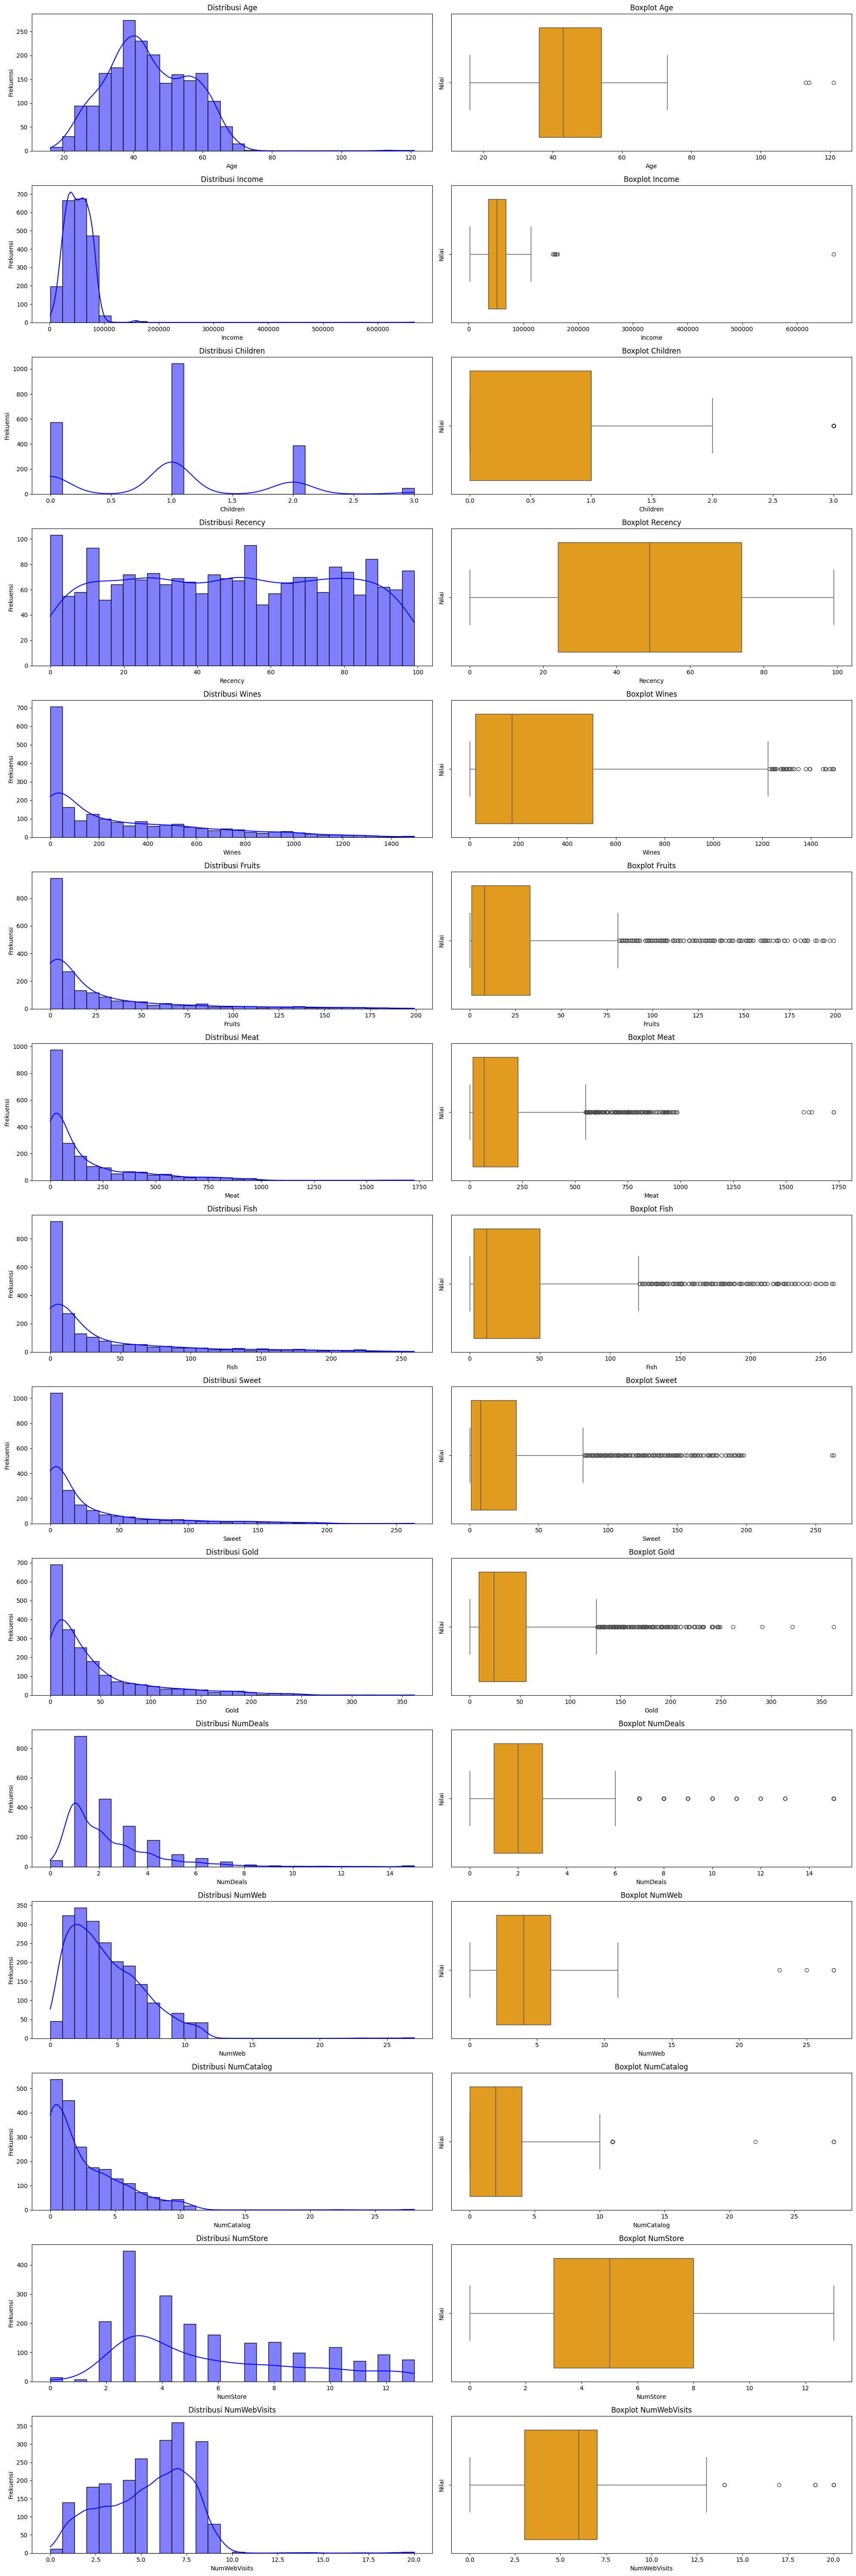

In [1317]:
# Menentukan ukuran figure untuk subplot
plt.figure(figsize=(20, len(num_cols) * 4))

# Looping melalui setiap kolom untuk menampilkan distribusi dan boxplot
for i, column in enumerate(num_cols, 1):
    # Subplot untuk distribusi
    plt.subplot(len(num_cols), 2, 2*i-1)
    sns.histplot(df[column], bins=30, kde=True, color='blue')
    plt.title(f'Distribusi {column}')
    plt.xlabel(column)
    plt.ylabel('Frekuensi')

    # Subplot untuk boxplot
    plt.subplot(len(num_cols), 2, 2*i)
    sns.boxplot(x=df[column], color='orange')
    plt.title(f'Boxplot {column}')
    plt.xlabel(column)
    plt.ylabel('Nilai')

# Menampilkan visualisasi
plt.tight_layout()
plt.show()

### **a. Column `Age`**

In [1318]:
display(df[df['Age'] > 80])
print(f'Umur {df['Age'][df['Age'] > 80].tolist()} sangat tidak relevan. Kemungkinan terjadi kesalahan, maka akan saya drop saja karena datanya hanya sedikit')
df.drop(df[df['Age'] > 80].index, inplace=True)

,Age,Age_group,Education,Marital_Status,Income,Children,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spending,NumDeals,NumWeb,NumCatalog,NumStore,NumWebVisits,Total_Purchases,Avg_spend,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Response,Campaign_Accepted
192,113,Elderly,Postgraduate,Divorced,36640.0,1,2013-09-26,99,15,6,8,7,4,25,65,1,2,1,2,5,5,5.0,0,0,0,0,0,1,0,0
239,121,Elderly,Postgraduate,Single,60182.0,1,2014-05-17,23,8,0,5,7,0,2,22,1,1,0,2,4,3,3.0,0,0,0,0,0,0,0,0
339,114,Elderly,Postgraduate,Married,83532.0,0,2013-09-26,36,755,144,562,104,64,224,1853,1,4,6,4,1,14,14.0,0,0,1,0,0,0,0,1


Umur [113, 121, 114] sangat tidak relevan. Kemungkinan terjadi kesalahan, maka akan saya drop saja karena datanya hanya sedikit


### **b. Column `Income`**

In [1319]:
# Menghitung IQR untuk Income
Q1_income = df['Income'].quantile(0.25)
Q3_income = df['Income'].quantile(0.75)
IQR_income = Q3_income - Q1_income

# Menentukan batasan outliers
lower_bound_income = Q1_income - (1.5 * IQR_income)
upper_bound_income = Q3_income + (1.5 * IQR_income)

# Identifikasi outliers
outliers_income = df[(df['Income'] < lower_bound_income) | (df['Income'] > upper_bound_income)]

# Jumlah outliers yang ditemukan
print(f"Outliers pada Income: {len(outliers_income)}")
outliers_income

Outliers pada Income: 8


,Age,Age_group,Education,Marital_Status,Income,Children,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spending,NumDeals,NumWeb,NumCatalog,NumStore,NumWebVisits,Total_Purchases,Avg_spend,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Response,Campaign_Accepted
164,41,Middle Age,Postgraduate,Married,157243.0,1,2014-03-01,98,20,2,1582,1,2,1,1608,15,0,22,0,0,22,1.466667,0,0,0,0,0,0,0,0
617,37,Middle Age,Postgraduate,Married,162397.0,2,2013-06-03,31,85,1,16,2,1,2,107,0,0,0,1,1,1,inf,0,0,0,0,0,0,0,0
655,39,Middle Age,Graduate,Divorced,153924.0,0,2014-02-07,81,1,1,1,1,1,1,6,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0
687,30,Middle Age,Postgraduate,Married,160803.0,0,2012-08-04,21,55,16,1622,17,3,4,1717,15,0,28,1,0,29,1.933333,0,0,0,0,0,0,0,0
1300,42,Middle Age,Postgraduate,Married,157733.0,1,2013-06-04,37,39,1,9,2,0,8,59,0,1,0,1,1,2,inf,0,0,0,0,0,0,0,0
1653,36,Middle Age,Graduate,Married,157146.0,0,2013-04-29,13,1,0,1725,2,1,1,1730,0,0,28,0,1,28,inf,0,0,0,0,0,0,0,0
2132,64,Adult,Postgraduate,Married,156924.0,0,2013-08-29,85,2,1,2,1,1,1,8,0,0,0,0,0,0,NaN,0,0,0,0,0,0,0,0
2233,36,Middle Age,Graduate,Married,666666.0,1,2013-06-02,23,9,14,18,8,1,12,62,4,3,1,3,6,7,1.750000,0,0,0,0,0,0,0,0


In [1320]:
df = df[~((df['Income'] < lower_bound_income) | (df['Income'] > upper_bound_income))]

> Karena persentasenya kecil, saya menghapus 8 data outlier tersebut tanpa kehilangan banyak informasi penting.</br>
Alasan : Menghapus outlier akan membuat distribusi Income lebih normal dan dapat meningkatkan akurasi model yang sensitif terhadap nilai ekstrem.

In [1321]:
display(df.head(), df.shape)

,Age,Age_group,Education,Marital_Status,Income,Children,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spending,NumDeals,NumWeb,NumCatalog,NumStore,NumWebVisits,Total_Purchases,Avg_spend,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Response,Campaign_Accepted
0,55,Adult,Graduate,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,22,7.333333,0,0,0,0,0,0,1,1
1,60,Adult,Graduate,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,4,2.000000,0,0,0,0,0,0,0,0
2,48,Adult,Graduate,Married,71613.0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,20,20.000000,0,0,0,0,0,0,0,0
3,30,Middle Age,Graduate,Married,26646.0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,3.000000,0,0,0,0,0,0,0,0
4,33,Middle Age,Postgraduate,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,14,2.800000,0,0,0,0,0,0,0,0


(2043, 30)

> Sebelum dibersihkan, terdapat 2240 baris data, sekarang terdapat 2043 baris. Sekitar 200 baris data yang outlier nya ekstrim dihapus dan ada data kosong diisi dengan data yang dirasa relevan.

# **Save Data Cleaning**

In [1322]:
df

,Age,Age_group,Education,Marital_Status,Income,Children,Dt_Customer,Recency,Wines,Fruits,Meat,Fish,Sweet,Gold,Total_Spending,NumDeals,NumWeb,NumCatalog,NumStore,NumWebVisits,Total_Purchases,Avg_spend,Cmp3,Cmp4,Cmp5,Cmp1,Cmp2,Complain,Response,Campaign_Accepted
0,55,Adult,Graduate,Single,58138.0,0,2012-09-04,58,635,88,546,172,88,88,1617,3,8,10,4,7,22,7.333333,0,0,0,0,0,0,1,1
1,60,Adult,Graduate,Single,46344.0,2,2014-03-08,38,11,1,6,2,1,6,27,2,1,1,2,5,4,2.000000,0,0,0,0,0,0,0,0
2,48,Adult,Graduate,Married,71613.0,0,2013-08-21,26,426,49,127,111,21,42,776,1,8,2,10,4,20,20.000000,0,0,0,0,0,0,0,0
3,30,Middle Age,Graduate,Married,26646.0,1,2014-02-10,26,11,4,20,10,3,5,53,2,2,0,4,6,6,3.000000,0,0,0,0,0,0,0,0
4,33,Middle Age,Postgraduate,Married,58293.0,1,2014-01-19,94,173,43,118,46,27,15,422,5,5,3,6,5,14,2.800000,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2232,26,Middle Age,Graduate,Single,26816.0,0,2012-08-17,50,5,1,6,3,4,3,22,1,0,0,3,4,3,3.000000,0,0,0,0,0,0,0,0
2235,46,Adult,Graduate,Married,61223.0,1,2013-06-13,46,709,43,182,42,118,247,1341,2,9,3,4,5,16,8.000000,0,0,0,0,0,0,0,0
2237,33,Middle Age,Graduate,Divorced,56981.0,0,2014-01-25,91,908,48,217,32,12,24,1241,1,2,3,13,6,18,18.000000,0,1,0,0,0,0,0,1
2238,58,Adult,Postgraduate,Married,69245.0,1,2014-01-24,8,428,30,214,80,30,61,843,2,6,5,10,3,21,10.500000,0,0,0,0,0,0,0,0


In [1323]:
df.to_csv('Supermarket_Cleaning.csv')